In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

predict continuos variables - regression

### Simple linear regression

y = b0 + b1X1

y => dependent variable
b0 => y intercept
b1 => slope coefficient 
X1 => independent variable

y<sub>i</sub> - y<sub>i</sub><sup>^</sup> = residuals

sum(residuals) => Ordinary least square method

In [92]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [93]:
df.shape

(30, 2)

In [94]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [95]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

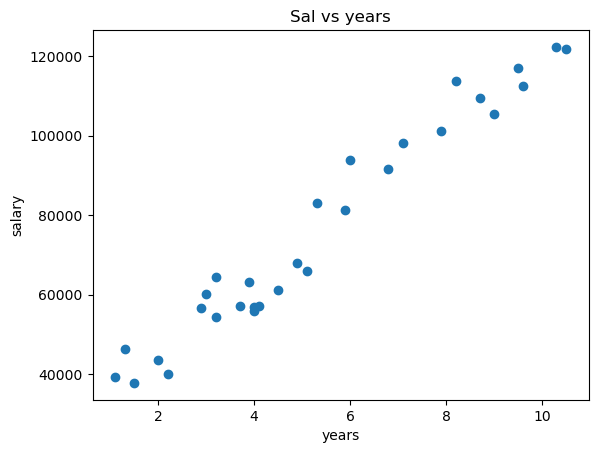

In [96]:
plt.scatter(df.YearsExperience,df.Salary); # linear increase
plt.xlabel("years")
plt.ylabel("salary")
plt.title("Sal vs years");

In [97]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary",axis=1)
y = df.Salary

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

In [98]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [100]:
regressor.score(X_test,y_test)

0.9704370358631644

In [101]:
y_preds = regressor.predict(X_test)
y_preds

array([ 35498.1103274 ,  80900.64376853,  99818.36603567, 122519.63275623,
        75225.32708839,  92251.27712881])

In [102]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_preds,y_test)

3300.651401240934

In [103]:
r2_score(y_preds,y_test) # accuracy

0.9728090299582253

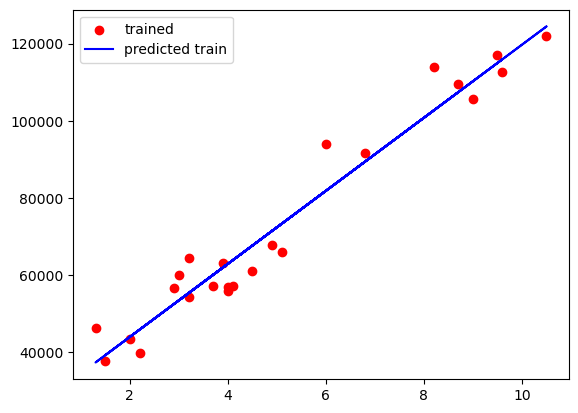

In [104]:
fig,ax = plt.subplots()
ax.scatter(X_train,y_train,color="r",label="trained")
ax.plot(X_train,regressor.predict(X_train),color="b",label="predicted train");
ax.legend();

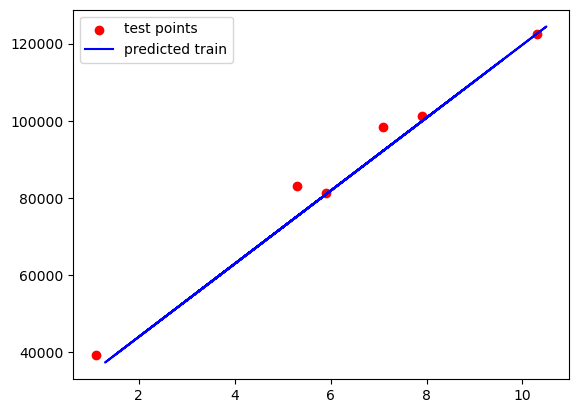

In [105]:
plt.scatter(X_test,y_test,label="test points",color="r")
plt.plot(X_train,regressor.predict(X_train),label="predicted train",color="b")
plt.legend();

### How do I predict the salary if input ("YearsOfGiven") as 12 - To make single prediction

In [106]:
regressor.predict([[12]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138599.6966833])

How to get the values for <b>b<sub>0</sub></b> and <b>b<sub>1</sub></b>

In [107]:
regressor.coef_,regressor.intercept_

(array([9458.86113357]), 25093.363080468742)

### Multiple linear regression

In [108]:
df_mlr =  pd.read_csv("50_Startups.csv")
df_mlr.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [109]:
df_mlr.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [110]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

multiple linear regression intuition for categorical variables

* never add two dummy variables in the dataset
* D1 , D2 dummy variables 
* intuition is your are duplicating the variable ->  D2 = 1 - D1 (always)

* phenomenon where one or more independent varibles determine the other - > multicolinearility

* <b>dummy variable trap</b> - always eliminate one dummy varible independent of how many dummy variables you have

#### Backward elimination

5 methods for building models

* All in one - prior knowledge, you have to choose all features, preparing for backward elimination
* Backward elimination
* Forward selection
* Bidirectional elimination
* Score comparison

First 3 Stepwise regression

### Backward elimination

* Select significance level to stay in the model
* Fit the full model with all possible predictors
* Consider the predictor with highest P-value
* Remove this predictor
* Rebuild the model without the variable
* Loop through until P< significance level

### Forward selection

* 1)Slect significance to enter the model
* 2)Fit all possible simple rergession models.Slect the one with lowest value
* 3)Keep this variable and fit all possible models with one extra predictor added to the ones you already have
* 4)Consider the predictor with lowest P-value. If P<SL move to step


In [111]:
df_mlr.shape

(50, 5)

In [112]:
df_mlr.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [113]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [114]:
def object_To_categorical(df):
    for col,val in df.items():
        if(pd.api.types.is_string_dtype(val)):
            df[col] = val.astype("category").cat.as_ordered()
object_To_categorical(df_mlr)

In [115]:
df_mlr.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [116]:
def categorical_To_numeric(df):
    for col,val in df.items():
        if not pd.api.types.is_numeric_dtype(val):
            df[col]=df[col].cat.codes+1
            
categorical_To_numeric(df_mlr)

In [117]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                 int8
Profit             float64
dtype: object

In [118]:
df_mlr.State.head()

0    3
1    1
2    2
3    3
4    2
Name: State, dtype: int8

In [119]:
df_mlr.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [120]:
X = df_mlr.drop("Profit",axis=1)
y = df_mlr.Profit

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

reg2 = LinearRegression()

reg2.fit(X_train2,y_train2)

LinearRegression()

In [125]:
y_preds = reg2.predict(X_test2)
y_preds

array([ 99835.18886699,  66537.43455226, 181211.92025125,  57449.78898838,
        44809.35382371,  83007.63389367, 114887.81752901,  65016.44995492,
       133923.18451985, 192097.74094192])

In [127]:
reg2.score(X_test,y_test)

0.9151534855272105

In [128]:
X_test.shape,y_test.shape

((10, 4), (10,))

In [129]:
X_train.shape,y_train.shape

((40, 4), (40,))